# 第一章 图

## 1.2 图、节点和边 

- 创建一个 DGLGraph 对象的一种方法是使用 dgl.graph() 函数。

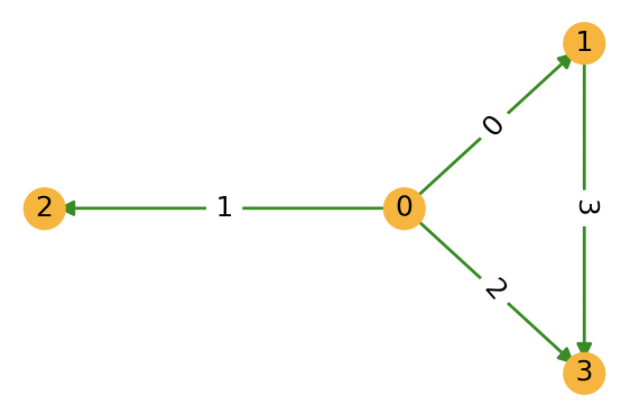

In [1]:
import dgl
import torch

In [2]:
# 边 0->1, 0->2, 0->3, 1->3
u,v=torch.tensor([0,0,0,1]),torch.tensor([1,2,3,3]) # 边的点

In [3]:
u,v

(tensor([0, 0, 0, 1]), tensor([1, 2, 3, 3]))

In [4]:
g=dgl.graph((u,v))

In [5]:
g# 图中节点的数量是DGL通过给定的图的边列表中最大的点ID推断所得出的  有向图

Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={})

In [6]:
g.nodes() # 获取节点的ID 节点

tensor([0, 1, 2, 3])

In [7]:
g.edges() # 获取边的对应端点 边

(tensor([0, 0, 0, 1]), tensor([1, 2, 3, 3]))

In [8]:
g.edges(form='all')

(tensor([0, 0, 0, 1]), tensor([1, 2, 3, 3]), tensor([0, 1, 2, 3]))

In [9]:
g1= dgl.graph((u, v), num_nodes=8) #如果给了num_nodes有那么多点，但是边的关系不会增加

In [10]:
g1

Graph(num_nodes=8, num_edges=4,
      ndata_schemes={}
      edata_schemes={})

In [11]:
g1.nodes() 

tensor([0, 1, 2, 3, 4, 5, 6, 7])

In [12]:
g1.edges()

(tensor([0, 0, 0, 1]), tensor([1, 2, 3, 3]))

- 无向图 可以使用 dgl.to_bidirected()

In [13]:
bi_g=dgl.to_bidirected(g)


In [14]:
bi_g #num_edges=8,

Graph(num_nodes=4, num_edges=8,
      ndata_schemes={}
      edata_schemes={})

In [15]:
bi_g.edges()

(tensor([0, 0, 0, 1, 1, 2, 3, 3]), tensor([1, 2, 3, 0, 3, 0, 0, 1]))

- 推荐写法

In [16]:
edges=torch.tensor([2,5,3]),torch.tensor([3,5,0])

In [17]:
edges

(tensor([2, 5, 3]), tensor([3, 5, 0]))

In [18]:
g64=dgl.graph(edges)

In [19]:
g64

Graph(num_nodes=6, num_edges=3,
      ndata_schemes={}
      edata_schemes={})

In [21]:
g64.idtype

torch.int64

In [23]:
g32 = dgl.graph(edges, idtype=torch.int32)  # 使用int32构建图

In [24]:
g32.idtype

torch.int32

In [26]:
g64_2=g32.long()
g64_2.idtypetype

torch.int64

In [27]:
g__=g64.int()
g__.idtype


torch.int32

## 1.3 节点和边的特征 

- ndata和edata

In [29]:
import dgl
import torch 

In [30]:
edges=torch.tensor([0,0,1,5]),torch.tensor([1,2,2,0]) #6个节点，4条边
g=dgl.graph(edges)

In [31]:
g

Graph(num_nodes=6, num_edges=4,
      ndata_schemes={}
      edata_schemes={})

In [32]:
g.ndata['x']=torch.ones(g.num_nodes(),3) #长度为3的节点特征

In [33]:
g.ndata['x']

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [34]:
g

Graph(num_nodes=6, num_edges=4,
      ndata_schemes={'x': Scheme(shape=(3,), dtype=torch.float32)}
      edata_schemes={})

In [37]:
g.edata['x']=torch.ones(g.num_edges(),dtype=torch.int32)

In [38]:
g.edata['x']

tensor([1, 1, 1, 1], dtype=torch.int32)

In [39]:
g# 不同名称的特征可以具有不同形状

Graph(num_nodes=6, num_edges=4,
      ndata_schemes={'x': Scheme(shape=(3,), dtype=torch.float32)}
      edata_schemes={'x': Scheme(shape=(), dtype=torch.int32)})

In [42]:
g.ndata['y'] = torch.randn(g.num_nodes(), 5)

In [44]:
g #同一张图不同时刻或者meta path设计不同 所以dim不同

Graph(num_nodes=6, num_edges=4,
      ndata_schemes={'x': Scheme(shape=(3,), dtype=torch.float32), 'y': Scheme(shape=(5,), dtype=torch.float32)}
      edata_schemes={'x': Scheme(shape=(), dtype=torch.int32)})

In [45]:
g.ndata

{'x': tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]), 'y': tensor([[-0.9794, -0.1015,  0.9579,  1.1710, -0.5652],
        [-3.3187, -1.1832, -1.0614, -2.1423,  0.2522],
        [-0.4542, -1.6443, -0.9261,  1.2409,  0.5249],
        [-0.6752, -0.0887,  0.5596,  0.3206,  0.6131],
        [ 0.8088, -0.6671,  0.7134,  1.8698, -0.6104],
        [-0.0274,  0.6350,  0.0571, -0.8970,  1.3091]])}

In [48]:
g.ndata['x'][1] #节点1的特征

tensor([1., 1., 1.])

In [49]:
g.ndata['y'][1]

tensor([-3.3187, -1.1832, -1.0614, -2.1423,  0.2522])

In [50]:
g

Graph(num_nodes=6, num_edges=4,
      ndata_schemes={'x': Scheme(shape=(3,), dtype=torch.float32), 'y': Scheme(shape=(5,), dtype=torch.float32)}
      edata_schemes={'x': Scheme(shape=(), dtype=torch.int32)})

In [51]:
g.edata

{'x': tensor([1, 1, 1, 1], dtype=torch.int32)}

In [52]:
g.edata['x'][torch.tensor([0, 3])]

tensor([1, 1], dtype=torch.int32)

In [57]:
# 加权图
edges=torch.tensor([0,0,0,1]),torch.tensor([1,2,3,3])
weights=torch.tensor([0.1,0.6,0.9,0.7]) #每条边的权重

In [58]:
g=dgl.graph(edges)

In [59]:
g

Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={})

In [60]:
g.edata['w']=weights

In [61]:
g

Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={'w': Scheme(shape=(), dtype=torch.float32)})

- 节点和边的特征可以具有相同的名称（如上述示例代码中的 'x' ）
- 创建了 2 个节点特征（'x' 、 'y' ）和 1 个边特征

## 1.4 从外部源创建图 

- 从用于图和稀疏矩阵的外部 Python 库（NetworkX 和 SciPy）创建而来。

- 从磁盘加载图数据。

In [63]:
#从 SciPy 稀疏矩阵和 NetworkX 图创建 DGL 图的示例。
import dgl
import torch 
import scipy.sparse as sp

In [65]:
spmat=sp.rand(100,100,density=0.05)#5% 非零项 

In [68]:
spmat

<100x100 sparse matrix of type '<class 'numpy.float64'>'
	with 500 stored elements in COOrdinate format>

In [69]:
g=dgl.from_scipy(spmat)

In [70]:
g

Graph(num_nodes=100, num_edges=500,
      ndata_schemes={}
      edata_schemes={})

In [71]:
import networkx as nx

In [72]:
nx_g=nx.path_graph(5) # 一条路 0-1-2-3-4 # 双向

In [73]:
nx_g

In [74]:
dgl.from_networkx(nx_g) 

Graph(num_nodes=5, num_edges=8,
      ndata_schemes={}
      edata_schemes={})

- 当使用 nx.path_graph(5) 进行创建时， DGLGraph 对象有 8 条边，而非 4 条。
- 这是由于 nx.path_graph(5) 构建了一个无向的 NetworkX 图 networkx.Graph ，而 DGLGraph 的边总是有向的。 
- 使用有向的 NetworkX 图 networkx.DiGraph 可避免该行为。 


In [76]:
nxg=nx.DiGraph([(2,1),(1,2),(2,3),(0,0)])

In [77]:
dgl.from_networkx(nxg)

Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={})

### dgl导入csv文件

- The nodes.csv stores every club members and their attributes.
- The edges.csv stores the pair-wise interactions between two club members.

使用data中 gen_data.py生成csv文件

In [1]:
import pandas as pd
nodes_data = pd.read_csv('data/nodes.csv')

In [2]:
nodes_data.head()

,Id,Club,Age
0,0,Mr. Hi,45
1,1,Mr. Hi,33
2,2,Mr. Hi,36
3,3,Mr. Hi,31
4,4,Mr. Hi,41


In [3]:
edges_data = pd.read_csv('data/edges.csv')
edges_data.head()
# 0 ->1  w权重

,Src,Dst,Weight
0,0,1,0.318451
1,0,2,0.551215
2,0,3,0.227416
3,0,4,0.266919
4,0,5,0.475449


In [4]:
edges_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Src     156 non-null    int64  
 1   Dst     156 non-null    int64  
 2   Weight  156 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 3.8 KB


In [5]:
import dgl

In [6]:
src=edges_data['Src'].to_numpy()
dst=edges_data['Dst'].to_numpy()

In [7]:
g=dgl.graph((src,dst))

In [8]:
g

Graph(num_nodes=34, num_edges=156,
      ndata_schemes={}
      edata_schemes={})

In [9]:
import networkx as nx
nx_g=g.to_networkx().to_undirected()

In [10]:
nx_g

## 异构图

相比同构图，异构图里可以有不同类型的节点和边。这些不同类型的节点和边具有独立的 ID 空间和特征。 例如在下图中，” 用户” 和” 游戏” 节点的 ID 都是从 0 开始的，而且两种节点具有不同的特征。

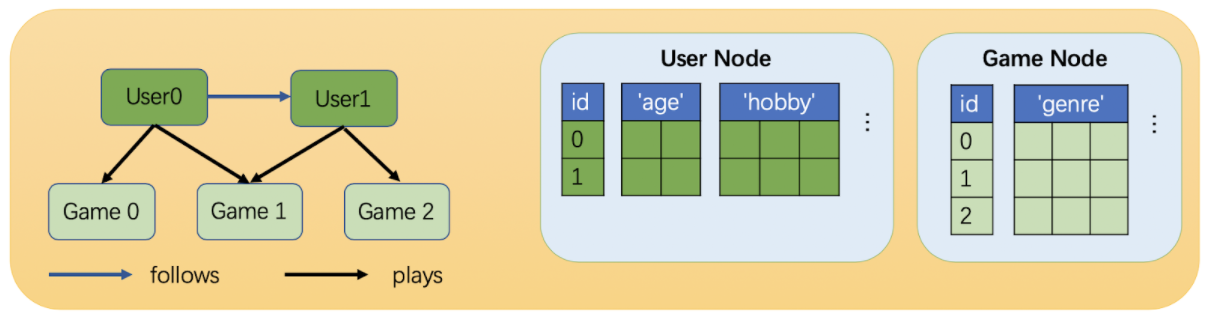

该图具有两种类型的节点 (“用户” 和” 游戏”) 和两种类型的边 (“关注” 和” 玩”)。

- 个异构图由一系列子图构成
- 一个子图对应一种关系。
- 每个关系由一个字符串三元组 定义 (源节点类型, 边类型, 目标节点类型)

In [4]:
import dgl
import torch 

In [5]:
graph_data={('drug', 'interacts', 'drug'): (torch.tensor([0, 1]), torch.tensor([1, 2])),
              ('drug', 'interacts', 'gene'): (torch.tensor([0, 1]), torch.tensor([2, 3])),
            ('drug', 'treats', 'disease'): (torch.tensor([1]), torch.tensor([2]))
           }

In [6]:
g=dgl.heterograph(graph_data)

In [7]:
g

Graph(num_nodes={'disease': 3, 'drug': 3, 'gene': 4},
      num_edges={('drug', 'interacts', 'drug'): 2, ('drug', 'interacts', 'gene'): 2, ('drug', 'treats', 'disease'): 1},
      metagraph=[('drug', 'drug', 'interacts'), ('drug', 'gene', 'interacts'), ('drug', 'disease', 'treats')])

In [8]:
g.ntypes

['disease', 'drug', 'gene']

In [9]:
g.etypes

['interacts', 'interacts', 'treats']

In [10]:
g.canonical_etypes

[('drug', 'interacts', 'drug'),
 ('drug', 'interacts', 'gene'),
 ('drug', 'treats', 'disease')]

In [11]:
g.num_nodes()# 获取图中所有节点的数量

10

In [12]:
g.num_nodes('drug')# 获取drug节点的数量

3

## 1.6在 GPU 上使用 DGLGraph

- 1. 在构造过程中传入两个 GPU 张量来创建 GPU 上的 DGLGraph 
- 2. to() API 将 DGLGraph 复制到 GPU

法二

In [13]:
import dgl
import torch as th
u, v = th.tensor([0, 1, 2]), th.tensor([2, 3, 4])
g = dgl.graph((u, v))
g.ndata['x'] = th.randn(5, 3)   # 原始特征在CPU上

In [14]:
g.device

device(type='cpu')

In [15]:
cuda_g = g.to('cuda:0')         # 接受来自后端框架的任何设备对象
cuda_g.device

device(type='cuda', index=0)

In [16]:
cuda_g.ndata['x'].device 

device(type='cuda', index=0)

法一

In [17]:
# 由GPU张量构造的图也在GPU上
u, v = u.to('cuda:0'), v.to('cuda:0')
g = dgl.graph((u, v))
g.device

device(type='cuda', index=0)

In [18]:
cuda_g.in_degrees()

tensor([0, 0, 1, 1, 1], device='cuda:0')

In [19]:
cuda_g.in_edges([2, 3, 4])                          # 可以接受非张量类型的参数

(tensor([0, 1, 2], device='cuda:0'), tensor([2, 3, 4], device='cuda:0'))